# Capillary Action Model

In [2]:
import sys
sys.path.append("..")
from sicm.models.model import Pipette, Medium, CapillaryAction

import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# for theta: https://iopscience.iop.org/article/10.1088/2051-672X/aa6e02/meta
medium = Medium(theta = 20, gamma = 0.072, rho = 997 - 1.184)
pipette = Pipette(length = 4e-2, d_body = 200e-6, d_tip = 3e-6, alpha = 5)

..\sicm\models\model.py:404: RuntimeWarning: invalid value encountered in arccos
  alpha = self.medium.theta - np.rad2deg(np.arccos(cos_alpha_hat))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2

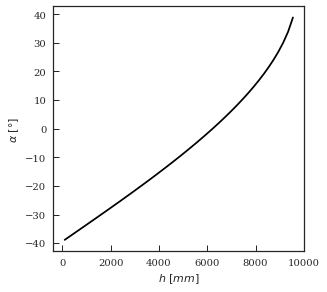

In [4]:
ca = CapillaryAction(medium, pipette)
h_span = np.linspace(1e-1, 2e1, 100)
alpha_span = ca._calculate_alpha(h_span)
ca.plot(h_span*1e3, alpha_span, r"$h\ [mm]$", r"$\alpha\ [\degree]$")

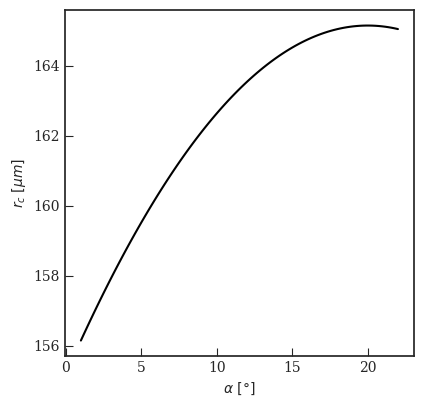

In [7]:
ca = CapillaryAction(medium, pipette)
alpha_span = np.linspace(1, 22, 100)
rc_span = ca._calculate_constriction(alpha_span)
ca.plot(alpha_span, rc_span*1e6, r"$\alpha\ [\degree]$", r"$r_c\ [\mu m]$",)

# Nanoparticle Heaters Model
Model of single nanoparticle as a heater. For references, see OneNote notebook and Zotero (tag:nannoparticles.)

In [1]:
import sys
sys.path.append("..")
from sicm.plots import plot_generic

import numpy as np

%load_ext autoreload
%autoreload 2

In [3]:
def calculate_temperature_increase(I, sigma, kappa, r):
    """Calculate temperature increase around single plasmonic NP
    
    Parameters
    ----------------
    I: float
        incident power density in W/cm2
    sigma: float
        Absorption cross section in cm2
    kappa: float
        Heat conductivity in W/(m.K)
    r: float or array-like
        Distances at which to calculate temperature increase, in nm
    
    Returns
    -----------------
    T_delta: float or array-like
        Temperature increase at distances r, in K
    """
    r = r * 1e-7 # convert nanometers to centimeters
    T_increase = (I * sigma) / (4 * np.pi * kappa) * (1/ r)
    return T_increase

def calculate_power_density(P, d):
    """Calculate power density supplied by laser
    
    Parameters
    ----------
    P: float
        Power in W
    d: float
        Laser spot diameter at focal plane, in mm
    
    Returns
    ----------
    rho: float
        Power density in W/cm2
    """
    d = d / 10 # convert mm to cm
    A = np.pi * (d / 2)**2
    rho = P / A
    return rho

def plot_temperature(r, T, x_lab = r"$r\ [nm]$", y_lab = r"$\Delta T\ [K]$",):
    """Render plot of r vs T"""
    plot_generic([r], [T], [x_lab], [y_lab])

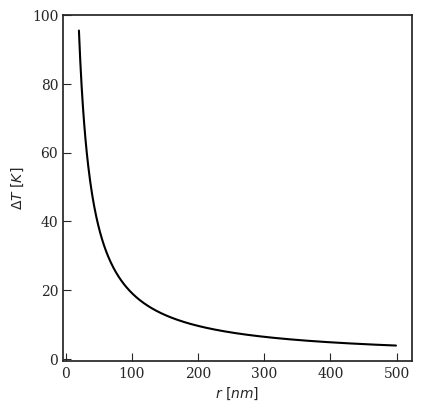

In [5]:
P = 0.5 # power in watts
transmitance = 0.85 # transmitace at given wavelength
d = 0.575 # laser spot diameter in mm
sigma = 8.8e-6 # absorption cross section in cm2
kappa = 0.6 # thermal conductivity of medium
r = np.arange(20, 500, 1) # distance in nm

I = calculate_power_density(P * transmitance, d)
T_delta = calculate_temperature_increase(I, sigma, kappa, r)
plot_temperature(r, T_delta)


# Gaussian Beam Model

Fit gaussian beam to an image data.
For assigning window extents, use infromation from: `S:\UsersData\Martin\2019\03_Mar\15\tip_opening\calibration_grid\scale_settings.png`:
    -window size = $139.75 x 104.80 \mu m$.

In [63]:
import sys
sys.path.append("..")
from sicm import io, plots
import numpy as np
import matplotlib.pyplot as plt

from sicm.models.beam import GaussianBeam

import skimage

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
datadir = "S:\\UsersData\\Martin\\2019\\05_May\\14"
exp_name = "laser_beam_40x_4p96AU.png"
gb = GaussianBeam(datadir, exp_name)
gb.thresh()

In [65]:
gb.fit_circle()

In [66]:
gb.convert_to_polar(139.75e-6, 104.8e-6)

### Results
Ok, So I think I implemented everything correctly, but I am not getting anywhere with this because:

* the image is saturated
* the data is plain png, no information on camera calibration, raw_values

As this is not crucial at this point, I suggest to halt this. I can try to save it as tiff sometimes later.

Fitting GaussianBeam._fit_wrapper.<locals>._gaussian_beam_model to 280911 datapoints ...
Found parameters: [3.20869362e-06 1.15833088e-04].
Finished in 0.618 s
error on fit: 1.885496040E+03


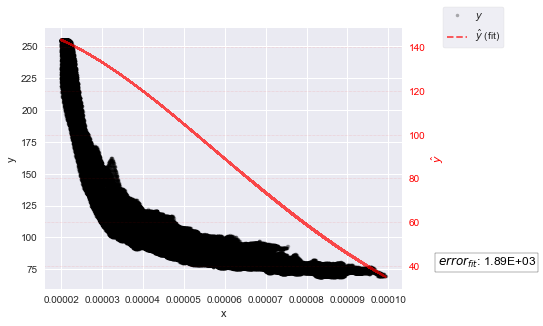

FWHM = 1.364e-04 m


In [67]:
gb.fit()
print("FWHM = {:.3e} m".format(gb.fwhm))

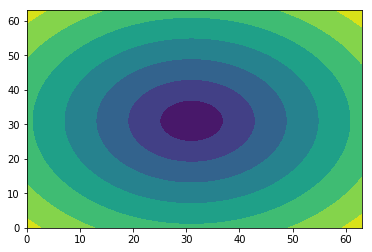

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 64); x -= x[31]#x = np.roll(x, 32)
y = np.arange(0, 64); y-= y[31]# y = np.roll(y, 32)
xx, yy = np.meshgrid(x, y)
rho = np.sqrt(xx**2 + yy**2)
plt.contourf(rho)

# Debye Length

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
eps_r = 80.2 # -
eps_0 =  8.8541878128e-12 # F/m
eps = eps_r * eps_0
e = 1.60217662e-19 # C
N_A = 6.0221409e23 # 1/mol
c = 0.25 # M
z = 1 # -
T = 298.15 # K
R = 8.314462618 # J/(K*mol)
I_c = lambda x: 0.5 * ((x*z)+(x*z)) # 2 component salt KCl

In [22]:
c = np.logspace(-9, 0)
lambda_D = lambda x: np.sqrt((eps * R * T) / (2 * e**2 * N_A**2 * I_c(x)))

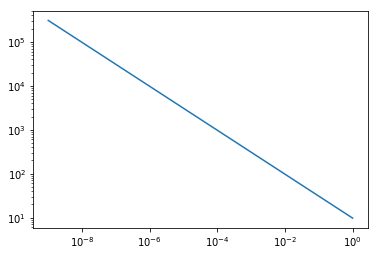

In [23]:
plt.loglog(c, lambda_D(c) * 1e9)

# Thermophoresis, Soret coefficient

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def S_T(T):
    """Caclulate value of Soret's coefficient at given temperature
    
    Equation from Roemer at al, 2013. Possibly valid only for c = 0.5M!
    However, it gives a reasonable value and this I stick with it.
    """
    T_sign_reverse = 293 # K, temeprature at which S_T reverses sign
    gamma = 102 # K, miscelaneous parameter
    S_T_inf = 0.0098 # high-T thermophobic limit
    S_T = S_T_inf * (1 - np.exp((T_sign_reverse - T) / gamma))
    return S_T

def c_salt(T, c0, T0):
    """Calculate adjusted concentration due to thermophoresis"""
    c = c0 * np.exp(-S_T(T) * (T - T0))
    return c

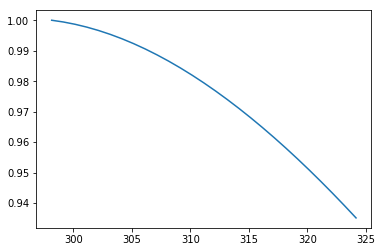

In [39]:
T = np.arange(298.15, 325, 1)
c0 = 0.25
T0 = 298.15
plt.plot(T, c_salt(T, c0, T0) / c0)

------
## Archived Approach

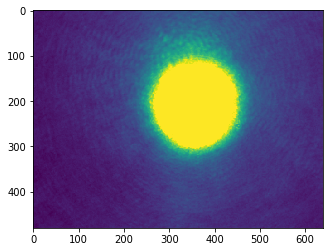

In [3]:
datadir = "S:\\UsersData\\Martin\\2019\\05_May\\14"
exp_name = "laser_beam_40x_4p96AU.png"
img = io.rgb2gray(io.load_image(datadir, exp_name))
plt.imshow(img)

Ok this is fine. next you should bedoing something like

```python
thresh = skimage.thresh(moving_average(img))
img_binary = img > threhs
center, radius = fit_circle(img_binary)
img_rcoords = convert_to_polar(img, center, y)

gbeam = GaussianBeam(img_coords, img)

gbeam.fit()
print(gbeam.fwhm)
```

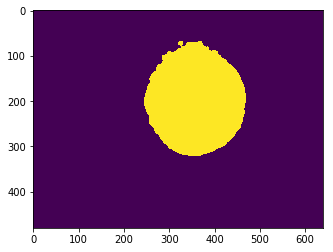

In [16]:
from skimage.morphology import square
img_filt = skimage.filters.rank.mean(img, square(10))
thresh = skimage.filters.threshold_otsu(img_filt)
img_binary = img_filt > thresh
plt.imshow(img_binary)